### **Statistical NLP**
#### **Speech Phoneme Analysis and Classification**

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Loading the csv file

speech_df = pd.read_csv('formants_coursework.csv')

In [3]:
speech_df.head()

,accent,speaker_label,gender,word,start_time,end_time,vowel_phoneme,class,formant_1,formant_2,formant_3
0,brm_001,alw001,F,hard,4.812,5.022,AA,1,798.1047,1137.8611,2990.6073
1,brm_001,alw001,F,head,2.930,2.986,EH,2,763.6447,2364.9183,3126.4781
2,brm_001,alw001,F,hoed,16.909,17.073,OW,3,648.5709,1659.9122,2890.6572
3,brm_001,cxb001,F,hard,3.801,3.936,AA,1,859.2465,977.4035,2900.8164
4,brm_001,cxb001,F,head,2.644,2.717,EH,2,757.7124,2280.9455,3223.7855


In [4]:
# Mapping Gender
gender_map = {'F':0, 'M':1}
speech_df['gender'] = speech_df['gender'].map(gender_map)

In [5]:
formants = ['formant_1','formant_2','formant_3']

In [6]:
def split_dataset(df, test_size, random_state, gender= 'both'):
    
    '''
    Input: dataframe to be split, the size in decimals of the test set, the random state for reproducibility,
           gender (options : 'male', 'female', 'both')
    Output: the split dataset into training and testing sets
    '''
    
    # Setting two separate dataframes - one for Males and one for Females
    df_male = df[df.gender == 1].copy()
    df_female = df[df.gender == 0].copy()
    
    # Splitting each set into 75% training and 25% testing
    m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(df_male[formants], df_male['class'], test_size = test_size, random_state = random_state)
    f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(df_female[formants], df_female['class'], test_size = test_size, random_state = random_state)
    
    if gender == 'both':
        # Concatenating dataframes
        X_train = pd.concat([m_X_train, f_X_train], axis=0)
        X_test = pd.concat([m_X_test, f_X_test], axis=0)
        y_train = pd.concat([m_y_train, f_y_train], axis=0)
        y_test = pd.concat([m_y_test, f_y_test], axis=0)
        
    elif gender == 'male':
        X_train = m_X_train.copy()
        X_test = m_X_test.copy()
        y_train = m_y_train.copy()
        y_test = m_y_test.copy()
        
    elif gender == 'female':
        X_train = f_X_train.copy()
        X_test = f_X_test.copy()
        y_train = f_y_train.copy()
        y_test = f_y_test.copy()
        
        
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = split_dataset(speech_df, test_size = 0.25, random_state = 2024)

In [8]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3]), array([38, 38, 36]))

In [9]:
np.unique(y_test, return_counts=True)

(array([1, 2, 3]), array([12, 12, 14]))

#### **KNN Classifier**

In [10]:
def knn_evaluation(n, metric='minkowski'):
    '''
    The function fits a KNN Classifier using the defined parameters to the given training set
    It then makes a prediction on the test set and calculates the accuracy and f1 score. 
    
    Input: n as number of neighbors, metric as the distance metric to choose
    Output: Plots a confusion matrix for the results and returns the accuracy and f1_score of the model on the test set
    '''
    
    
    knn = KNeighborsClassifier(n_neighbors=n, metric=metric)
    
    # Training
    knn.fit(X_train, y_train)
    
    # Prediction
    knn_preds = knn.predict(X_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, knn_preds)
    f1 = f1_score(y_test, knn_preds, average='macro')
    
    # Classification Report
    target_names = ['1','2','3']
    print(f'Classification report for N_Neighbors = {n}')
    print('*'*53)
    print(classification_report(y_test, knn_preds, target_names=target_names))
    print()
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
        
    # Changing color palette (cmap)
    disp.plot(cmap='Blues', ax=plt.gca())  # Use current axis
    
    # Adjust figure size
    plt.gcf().set_size_inches(4, 3)
    plt.title(f'Confusion Matrix for N_Neighbors = {n}')
    
    plt.show()
    
    print(f' With {n} neighbours : Accuracy : {accuracy} | F1 Score : {f1}')
    print()
    return accuracy, f1

Classification report for N_Neighbors = 1
*****************************************************
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.67      0.50      0.57        12
           3       0.56      0.71      0.63        14

    accuracy                           0.68        38
   macro avg       0.71      0.68      0.69        38
weighted avg       0.70      0.68      0.69        38




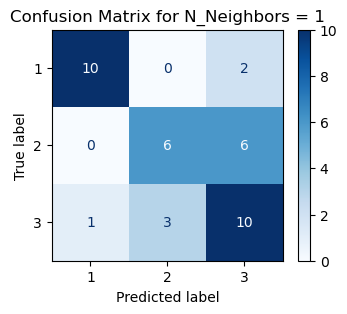

 With 1 neighbours : Accuracy : 0.6842105263157895 | F1 Score : 0.6886645962732919

Classification report for N_Neighbors = 2
*****************************************************
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.65      0.92      0.76        12
           3       0.71      0.36      0.48        14

    accuracy                           0.71        38
   macro avg       0.72      0.73      0.69        38
weighted avg       0.72      0.71      0.68        38




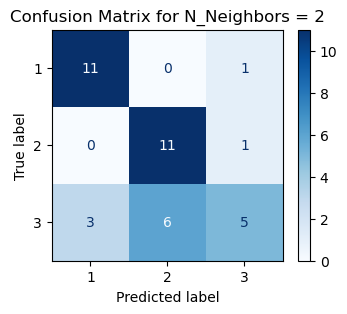

 With 2 neighbours : Accuracy : 0.7105263157894737 | F1 Score : 0.6936550039998316

Classification report for N_Neighbors = 3
*****************************************************
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        12
           2       0.77      0.83      0.80        12
           3       0.69      0.64      0.67        14

    accuracy                           0.76        38
   macro avg       0.76      0.77      0.77        38
weighted avg       0.76      0.76      0.76        38




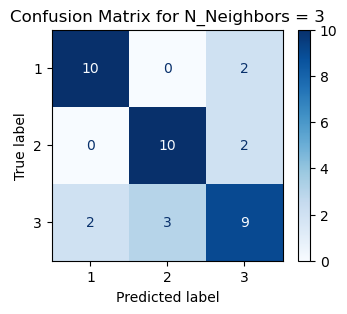

 With 3 neighbours : Accuracy : 0.7631578947368421 | F1 Score : 0.7666666666666666

Classification report for N_Neighbors = 4
*****************************************************
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.69      0.92      0.79        12
           3       0.86      0.43      0.57        14

    accuracy                           0.76        38
   macro avg       0.78      0.78      0.75        38
weighted avg       0.79      0.76      0.74        38




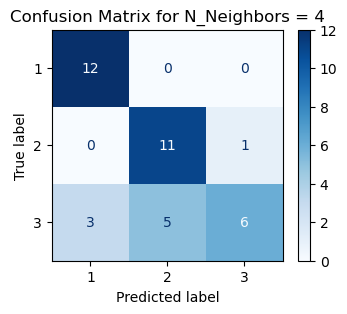

 With 4 neighbours : Accuracy : 0.7631578947368421 | F1 Score : 0.7486772486772487

Classification report for N_Neighbors = 5
*****************************************************
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.69      0.92      0.79        12
           3       0.75      0.43      0.55        14

    accuracy                           0.74        38
   macro avg       0.74      0.75      0.73        38
weighted avg       0.74      0.74      0.72        38




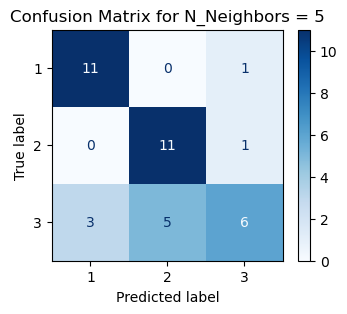

 With 5 neighbours : Accuracy : 0.7368421052631579 | F1 Score : 0.7257742257742258

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.75      1.00      0.86        12
           3       0.88      0.50      0.64        14

    accuracy                           0.79        38
   macro avg       0.80      0.81      0.78        38
weighted avg       0.81      0.79      0.77        38




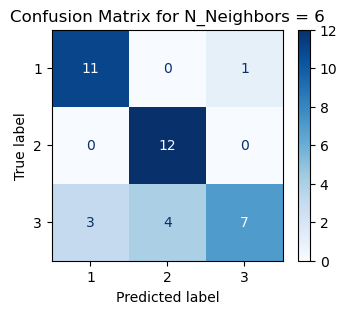

 With 6 neighbours : Accuracy : 0.7894736842105263 | F1 Score : 0.7798867798867799

Classification report for N_Neighbors = 7
*****************************************************
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.75      1.00      0.86        12
           3       0.90      0.64      0.75        14

    accuracy                           0.84        38
   macro avg       0.86      0.85      0.84        38
weighted avg       0.86      0.84      0.84        38




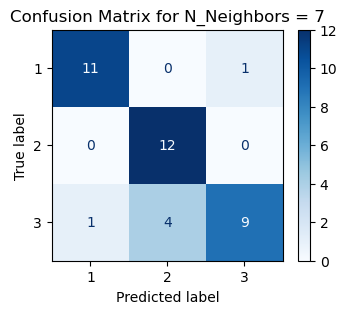

 With 7 neighbours : Accuracy : 0.8421052631578947 | F1 Score : 0.8412698412698413

Classification report for N_Neighbors = 8
*****************************************************
              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.71      1.00      0.83        12
           3       0.88      0.50      0.64        14

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.78        38
weighted avg       0.81      0.79      0.77        38




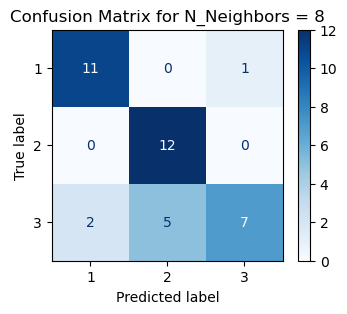

 With 8 neighbours : Accuracy : 0.7894736842105263 | F1 Score : 0.7813166144200626

Classification report for N_Neighbors = 9
*****************************************************
              precision    recall  f1-score   support

           1       0.86      1.00      0.92        12
           2       0.69      0.92      0.79        12
           3       0.88      0.50      0.64        14

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.78        38
weighted avg       0.81      0.79      0.77        38




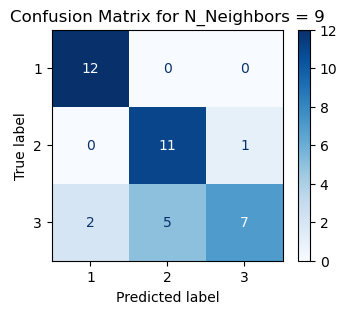

 With 9 neighbours : Accuracy : 0.7894736842105263 | F1 Score : 0.7817182817182817

Classification report for N_Neighbors = 10
*****************************************************
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        12
           2       0.75      1.00      0.86        12
           3       0.88      0.50      0.64        14

    accuracy                           0.79        38
   macro avg       0.80      0.81      0.78        38
weighted avg       0.81      0.79      0.77        38




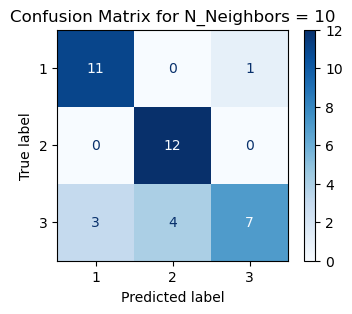

 With 10 neighbours : Accuracy : 0.7894736842105263 | F1 Score : 0.7798867798867799

Classification report for N_Neighbors = 11
*****************************************************
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.71      1.00      0.83        12
           3       1.00      0.43      0.60        14

    accuracy                           0.79        38
   macro avg       0.84      0.81      0.77        38
weighted avg       0.84      0.79      0.76        38




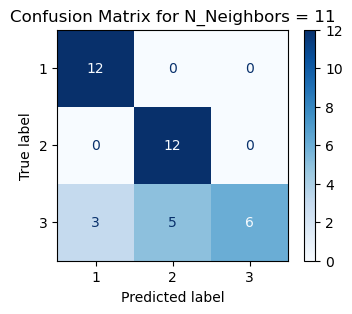

 With 11 neighbours : Accuracy : 0.7894736842105263 | F1 Score : 0.7721583652618135

Classification report for N_Neighbors = 12
*****************************************************
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.71      1.00      0.83        12
           3       1.00      0.43      0.60        14

    accuracy                           0.79        38
   macro avg       0.84      0.81      0.77        38
weighted avg       0.84      0.79      0.76        38




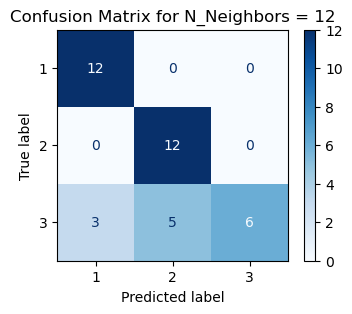

 With 12 neighbours : Accuracy : 0.7894736842105263 | F1 Score : 0.7721583652618135

Classification report for N_Neighbors = 13
*****************************************************
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.67      1.00      0.80        12
           3       1.00      0.36      0.53        14

    accuracy                           0.76        38
   macro avg       0.82      0.79      0.74        38
weighted avg       0.83      0.76      0.73        38




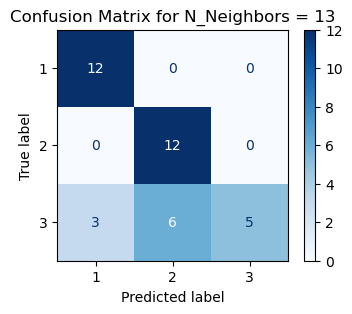

 With 13 neighbours : Accuracy : 0.7631578947368421 | F1 Score : 0.7384015594541911

Classification report for N_Neighbors = 14
*****************************************************
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           2       0.67      1.00      0.80        12
           3       1.00      0.29      0.44        14

    accuracy                           0.74        38
   macro avg       0.81      0.76      0.70        38
weighted avg       0.82      0.74      0.69        38




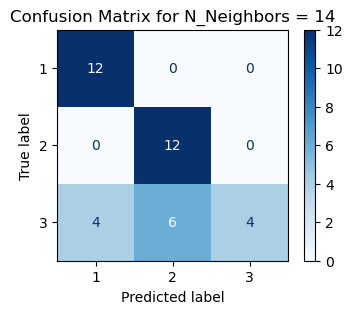

 With 14 neighbours : Accuracy : 0.7368421052631579 | F1 Score : 0.7005291005291006



In [11]:
scores = {}

for n in range(1,15):
    accuracy, f1 = knn_evaluation(n)
    scores[n] = accuracy, f1

#### *Visualizing the scores to choose the best k*

In [12]:
scores

{1: (0.6842105263157895, 0.6886645962732919),
 2: (0.7105263157894737, 0.6936550039998316),
 3: (0.7631578947368421, 0.7666666666666666),
 4: (0.7631578947368421, 0.7486772486772487),
 5: (0.7368421052631579, 0.7257742257742258),
 6: (0.7894736842105263, 0.7798867798867799),
 7: (0.8421052631578947, 0.8412698412698413),
 8: (0.7894736842105263, 0.7813166144200626),
 9: (0.7894736842105263, 0.7817182817182817),
 10: (0.7894736842105263, 0.7798867798867799),
 11: (0.7894736842105263, 0.7721583652618135),
 12: (0.7894736842105263, 0.7721583652618135),
 13: (0.7631578947368421, 0.7384015594541911),
 14: (0.7368421052631579, 0.7005291005291006)}

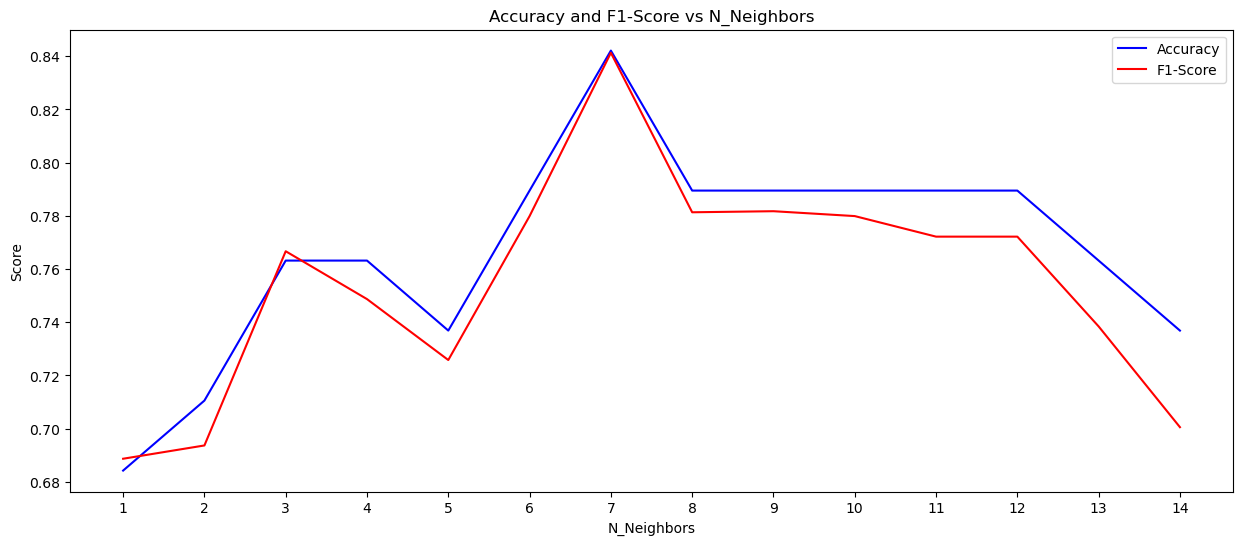

In [13]:
# Extract x values (keys) and y values (Accuracy and F1-Score)
x_values = list(scores.keys())
accuracy_values = [value[0] for value in scores.values()]
f1_score_values = [value[1] for value in scores.values()]

# Plotting
plt.figure(figsize=(15, 6))  
plt.plot(x_values, accuracy_values, color='blue', label='Accuracy')
plt.plot(x_values, f1_score_values, color='red', label='F1-Score')

plt.xticks(x_values)

# Adding labels and legend
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.title('Accuracy and F1-Score vs N_Neighbors')
plt.legend()

# Display plot
plt.show()

#### **Running the experiment with different training and test sets**

I will use the previously set up split_dataset function with different random_state parameters, to generate 5 different combinations of training and test sets. I will then slightly amend the knn_evaluation function to simply run the experiment without any output, and storing the information.

In [14]:
def knn_evaluation_no_output(n):
    '''
    Input: number of neighbors
    Output : accuracy and f1 score of the KNN Classifier
    '''
    
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Training
    knn.fit(X_train, y_train)
    
    # Prediction
    knn_preds = knn.predict(X_test)
    
    # Evaluation
    accuracy = accuracy_score(y_test, knn_preds)
    f1 = f1_score(y_test, knn_preds, average='macro')
    
    return accuracy, f1

In [15]:
# Generating 5 random numbers from random.org
#Timestamp: 2024-04-19 15:27:08 UTC
random_states = [3242, 9385, 8875, 8671, 5246]

In [16]:
rnd_scores = {}

for rnd_state in random_states:
    X_train, X_test, y_train, y_test = split_dataset(speech_df, test_size = 0.25, random_state = rnd_state)
    for n in range(1,15):
        accuracy, f1 = knn_evaluation_no_output(n)
        rnd_scores[(rnd_state,n)] = accuracy, f1

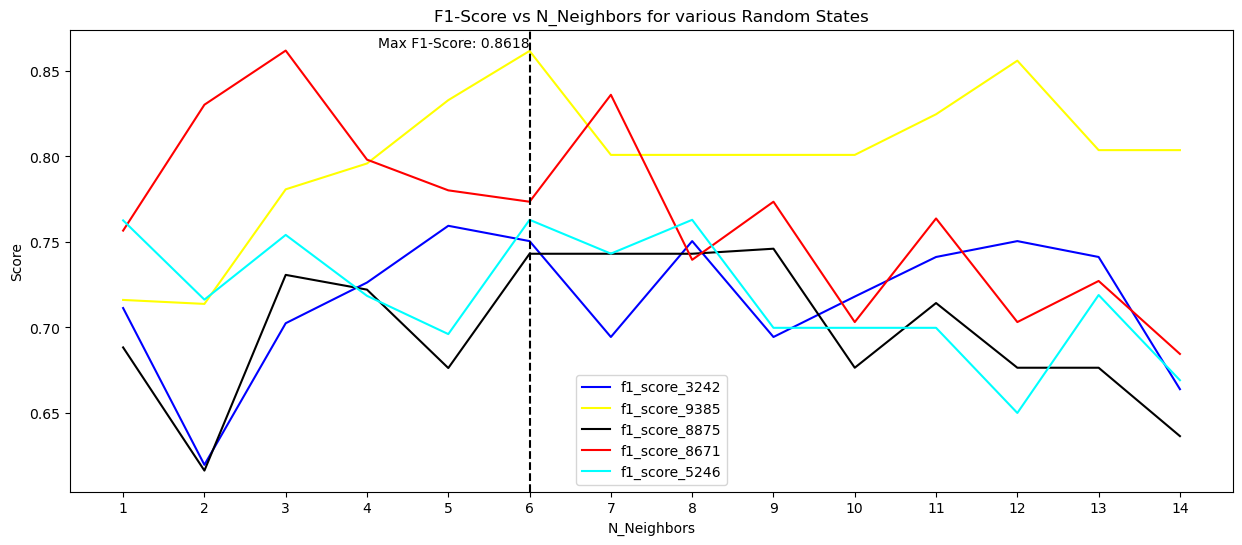

In [17]:
x_values = list(range(1,15))

f1_scores = {}
for r in random_states:
    f1_scores[f'f1_score_{r}'] = [value[1] for key, value in rnd_scores.items() if key[0] == r]

colors = ['blue','yellow','black','red','cyan']

max_y_value = np.max([np.max(scores) for scores in f1_scores.values()])  # Find maximum y-value

# Plotting
plt.figure(figsize=(15, 6))  

for key, color in zip(f1_scores.keys(), colors):
    plt.plot(x_values, f1_scores[key], color=color, label=key)

# Plotting vertical dotted black line at the point of the highest y-axis value
plt.axvline(x_values[np.argmax(f1_scores[key])], color='black', linestyle='--')

# Annotating the maximum y-value on the plot
plt.text(x_values[np.argmax(f1_scores[key])], max_y_value, f'Max F1-Score: {max_y_value:.4f}', ha='right', va='bottom')
    
    
plt.xticks(x_values)

# Adding labels and legend
plt.xlabel('N_Neighbors')
plt.ylabel('Score')
plt.title('F1-Score vs N_Neighbors for various Random States')
plt.legend()

# Display plot
plt.show()

#### **Running algorithm with best identified K and random state**

In [18]:
X_train, X_test, y_train, y_test = split_dataset(speech_df, test_size = 0.25, random_state = 9385)

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.71      1.00      0.83        10
           3       0.90      0.75      0.82        12

    accuracy                           0.87        38
   macro avg       0.87      0.88      0.86        38
weighted avg       0.89      0.87      0.87        38




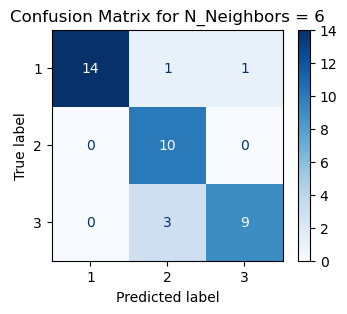

 With 6 neighbours : Accuracy : 0.868421052631579 | F1 Score : 0.8616161616161616



(0.868421052631579, 0.8616161616161616)

In [19]:
knn_evaluation(6)

#### **Experimenting with different distance metrics for top performing setup**

We have seeen that the maximum F1 score of 0.8618 was obtained when we split the dataset into the training and test component using random state 9385. The default distance metric used was the Minkowski. We shall now experiment with some other distance metrics. 

In [20]:
distances = ['canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'sqeuclidean']

In [21]:
X_train, X_test, y_train, y_test = split_dataset(speech_df, test_size = 0.25, random_state = 9385)

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        16
           2       0.62      1.00      0.77        10
           3       1.00      0.50      0.67        12

    accuracy                           0.82        38
   macro avg       0.85      0.81      0.79        38
weighted avg       0.88      0.82      0.81        38




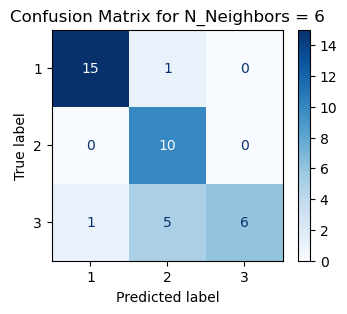

 With 6 neighbours : Accuracy : 0.8157894736842105 | F1 Score : 0.7911324786324786

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       0.71      1.00      0.83        10
           3       0.89      0.67      0.76        12

    accuracy                           0.84        38
   macro avg       0.85      0.85      0.83        38
weighted avg       0.86      0.84      0.84        38




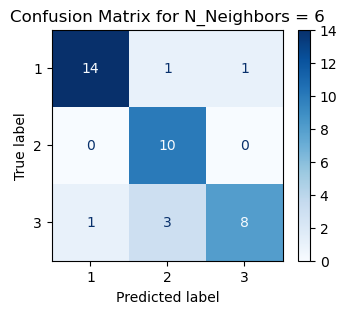

 With 6 neighbours : Accuracy : 0.8421052631578947 | F1 Score : 0.832821300563236

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.67      1.00      0.80        10
           3       1.00      0.67      0.80        12

    accuracy                           0.87        38
   macro avg       0.89      0.87      0.86        38
weighted avg       0.91      0.87      0.87        38




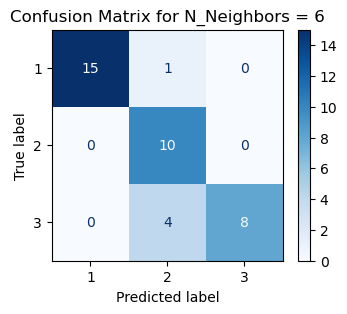

 With 6 neighbours : Accuracy : 0.868421052631579 | F1 Score : 0.8559139784946237

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       0.71      0.75      0.73        16
           2       0.53      0.80      0.64        10
           3       0.67      0.33      0.44        12

    accuracy                           0.63        38
   macro avg       0.64      0.63      0.60        38
weighted avg       0.65      0.63      0.61        38




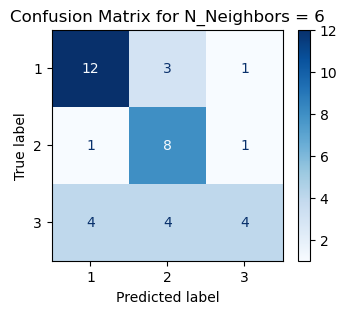

 With 6 neighbours : Accuracy : 0.631578947368421 | F1 Score : 0.6039057239057238

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.60      0.90      0.72        10
           3       0.86      0.50      0.63        12

    accuracy                           0.76        38
   macro avg       0.78      0.76      0.74        38
weighted avg       0.80      0.76      0.76        38




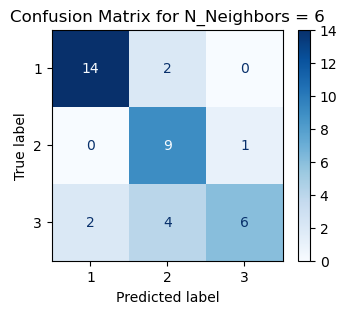

 With 6 neighbours : Accuracy : 0.7631578947368421 | F1 Score : 0.7421929824561403

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.71      1.00      0.83        10
           3       0.90      0.75      0.82        12

    accuracy                           0.87        38
   macro avg       0.87      0.88      0.86        38
weighted avg       0.89      0.87      0.87        38




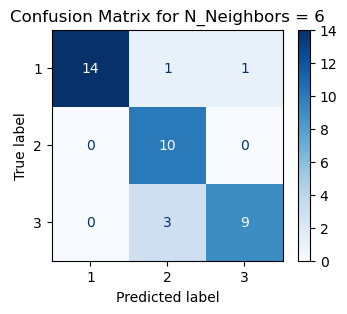

 With 6 neighbours : Accuracy : 0.868421052631579 | F1 Score : 0.8616161616161616



In [22]:
distance_scores = {}

for distance in distances:
    accuracy, f1 = knn_evaluation(6, distance)
    distance_scores[distance] = f1

In [23]:
distance_scores

{'canberra': 0.7911324786324786,
 'chebyshev': 0.832821300563236,
 'cityblock': 0.8559139784946237,
 'correlation': 0.6039057239057238,
 'cosine': 0.7421929824561403,
 'sqeuclidean': 0.8616161616161616}

#### **Experimenting with selected genders for training and testing**

We have seen that the maximum F1 score of 0.8618 was obtained when splitting the whole dataset into training and testing using random state 9385 and the Minkowski distance metric. We will now test whether using a dataset comprising one gender or the other produces different results between genders and in comparision with the whole dataset.

**Using Male Dataset**

In [24]:
X_train, X_test, y_train, y_test = split_dataset(speech_df, test_size = 0.25, random_state = 9385, gender = 'male')

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.83      1.00      0.91         5
           3       0.80      0.67      0.73         6

    accuracy                           0.84        19
   macro avg       0.84      0.85      0.84        19
weighted avg       0.84      0.84      0.84        19




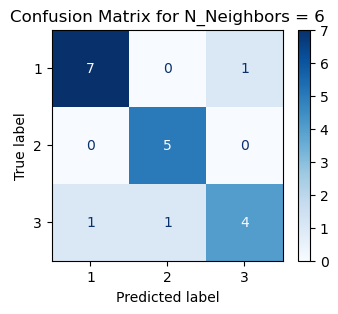

 With 6 neighbours : Accuracy : 0.8421052631578947 | F1 Score : 0.837121212121212



In [25]:
accuracy, f1 = knn_evaluation(6, metric='minkowski')

**Using Female Dataset**

In [26]:
X_train, X_test, y_train, y_test = split_dataset(speech_df, test_size = 0.25, random_state = 9385, gender = 'female')

Classification report for N_Neighbors = 6
*****************************************************
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         5
           3       0.86      1.00      0.92         6

    accuracy                           0.95        19
   macro avg       0.95      0.96      0.95        19
weighted avg       0.95      0.95      0.95        19




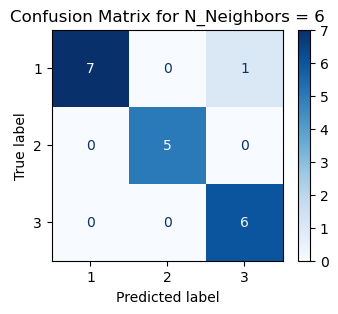

 With 6 neighbours : Accuracy : 0.9473684210526315 | F1 Score : 0.9521367521367522



In [27]:
accuracy, f1 = knn_evaluation(6, metric='minkowski')